In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [62]:
advertising = pd.read_csv('Advertising.csv')
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [63]:
advertising.drop("Unnamed: 0", axis = 1, inplace = True)

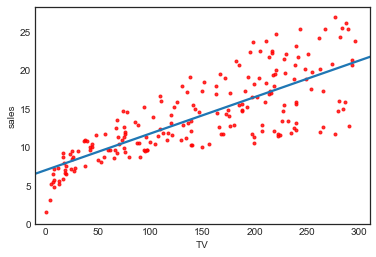

In [76]:
sns.regplot(y =  advertising.sales, x = advertising.TV, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

In [6]:
advertising.TV

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [78]:
est = smf.ols('sales ~ TV', advertising).fit()

In [83]:
est.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Sat, 28 Jan 2023",Prob (F-statistic):,1.47e-42
Time:,16:11:53,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [84]:
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [86]:
est.summary().tables[2]

Omnibus:,0.531,Durbin-Watson:,1.935
Prob(Omnibus):,0.767,Jarque-Bera (JB):,0.669
Skew:,-0.089,Prob(JB):,0.716
Kurtosis:,2.779,Cond. No.,338.


In [95]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [96]:
# RSS with regression coefficients
((advertising.sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()

2102.5305831313512

In [102]:
X = np.array(advertising.TV).reshape(-1,1)
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [103]:
Y = advertising.sales

In [104]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [105]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

regr.fit(X,Y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127695
[0.04753664]


In [106]:
Sales_pred = regr.predict(X)

In [111]:
Sales_pred

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [112]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [113]:
r2_score(Y, Sales_pred)

0.611875050850071

## Multiple Linear Regression

In [15]:
est = smf.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [17]:
est = smf.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [19]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        01:19:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [114]:
regr = skl_lm.LinearRegression()

X = advertising[['radio', 'TV']].values
X

array([[ 37.8, 230.1],
       [ 39.3,  44.5],
       [ 45.9,  17.2],
       [ 41.3, 151.5],
       [ 10.8, 180.8],
       [ 48.9,   8.7],
       [ 32.8,  57.5],
       [ 19.6, 120.2],
       [  2.1,   8.6],
       [  2.6, 199.8],
       [  5.8,  66.1],
       [ 24. , 214.7],
       [ 35.1,  23.8],
       [  7.6,  97.5],
       [ 32.9, 204.1],
       [ 47.7, 195.4],
       [ 36.6,  67.8],
       [ 39.6, 281.4],
       [ 20.5,  69.2],
       [ 23.9, 147.3],
       [ 27.7, 218.4],
       [  5.1, 237.4],
       [ 15.9,  13.2],
       [ 16.9, 228.3],
       [ 12.6,  62.3],
       [  3.5, 262.9],
       [ 29.3, 142.9],
       [ 16.7, 240.1],
       [ 27.1, 248.8],
       [ 16. ,  70.6],
       [ 28.3, 292.9],
       [ 17.4, 112.9],
       [  1.5,  97.2],
       [ 20. , 265.6],
       [  1.4,  95.7],
       [  4.1, 290.7],
       [ 43.8, 266.9],
       [ 49.4,  74.7],
       [ 26.7,  43.1],
       [ 37.7, 228. ],
       [ 22.3, 202.5],
       [ 33.4, 177. ],
       [ 27.7, 293.6],
       [  8

In [115]:
y = advertising.sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.921099912405138


In [29]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['radio', 'TV']].describe()

,radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [35]:
est = smf.ols('sales ~ TV + radio + TV*radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
X = advertising[["TV", "radio", "newspaper"]]
for i in range(3):
    print(X.columns[i], " = " , end = "")
    print(variance_inflation_factor(X.values, i)) 

TV  = 2.486771835198193
radio  = 3.285462100162896
newspaper  = 3.0552445106573853


In [117]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [123]:
X = advertising[["TV", "radio"]]
for i in range(2):
    print(X.columns[i], " = " , end = "")
    print(variance_inflation_factor(X.values, i)) 

TV  = 2.238084900165853
radio  = 2.238084900165853


In [127]:
auto = pd.read_csv('Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


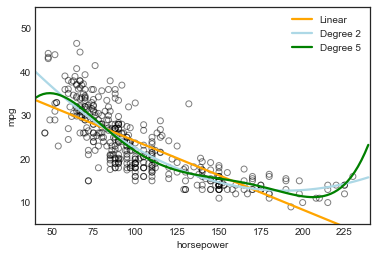

In [128]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(x = auto.horsepower, y = auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(x = auto.horsepower, y = auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x = auto.horsepower, y = auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(x = auto.horsepower, y = auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [131]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,pred1,resid1,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,19.416046,-1.416046,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13.891480,1.108520,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,16.259151,1.740849,22500.0


In [132]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


In [133]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].values
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

In [134]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,pred1,resid1,horsepower2,pred2,resid2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,19.416046,-1.416046,16900.0,17.091508,0.908492
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13.891480,1.108520,27225.0,13.480156,1.519844
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,16.259151,1.740849,22500.0,14.658717,3.341283
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,16.259151,-0.259151,22500.0,14.658717,1.341283
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,17.837598,-0.837598,19600.0,15.752059,1.247941


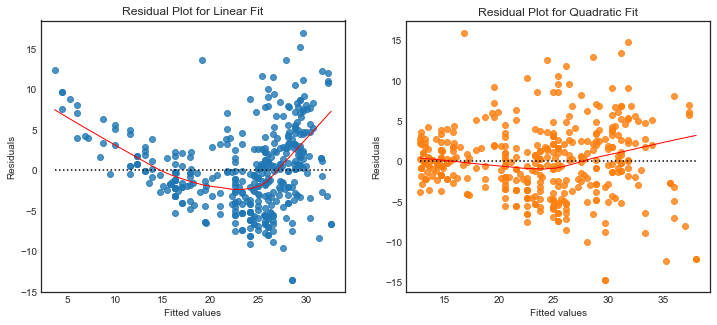

In [136]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(auto.pred1, auto.resid1, lowess=True,
            ax=ax1, line_kws={'color':'r', 'lw':1}
            )
ax1.hlines(0, xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            )
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

## Handling Categorical Variables

In [137]:
credit = pd.read_csv("credit.csv")

In [139]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [140]:
credit["Student"]

0       No
1      Yes
2       No
3       No
4       No
      ... 
395     No
396     No
397     No
398     No
399     No
Name: Student, Length: 400, dtype: object

In [141]:
credit["Student"].map({"Yes": 1, "No": 0})

0      0
1      1
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: Student, Length: 400, dtype: int64

In [142]:
credit["Student_code"] = credit["Student"].map({"Yes": 1, "No": 0})

In [143]:
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Student_code
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,0
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,1
2,104.593,7075,514,4,71,11,No,No,No,West,580,0


In [144]:
est = smf.ols('Balance ~ Student_code', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,480.3694,23.434,20.499,0.000,434.300,526.439
Student_code,396.4556,74.104,5.350,0.000,250.771,542.140


In [145]:
est = smf.ols('Balance ~ Student_code + Income', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,211.1430,32.457,6.505,0.000,147.333,274.952
Student_code,382.6705,65.311,5.859,0.000,254.272,511.069
Income,5.9843,0.557,10.751,0.000,4.890,7.079


In [146]:
est = smf.ols('Balance ~ Student_code + Income + Student_code*Income', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,200.6232,33.698,5.953,0.000,134.373,266.873
Student_code,476.6758,104.351,4.568,0.000,271.524,681.827
Income,6.2182,0.592,10.502,0.000,5.054,7.382
Student_code:Income,-1.9992,1.731,-1.155,0.249,-5.403,1.404


In [147]:
est.params

Intercept              200.623153
Student_code           476.675843
Income                   6.218169
Student_code:Income     -1.999151
dtype: float64

In [148]:
credit["Income*Student_code"] = credit["Income"]*credit["Student_code"]

In [149]:
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Student_code,Income*Student_code
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,0,0.000
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,1,106.025
2,104.593,7075,514,4,71,11,No,No,No,West,580,0,0.000


In [181]:
regr = skl_lm.LinearRegression()

# Linear fit
X = credit[["Income", "Student_code", "Income*Student_code"]].values
y = credit.Balance
regr.fit(X, y)


LinearRegression()

In [184]:
regr.coef_

array([  6.21816874, 476.67584321,  -1.99915087])

In [185]:
regr.intercept_

200.62315294978123